# 02: Creating Plots

In this chapter we will look at how to plot data from a NetCDF file. We will look at a 1D data variable as well as some 2D data that we will plot on a map. Let's load in some libraries that we will use.

In [1]:
#install.packages("RNetCDF")
#install.packages("ggplot2")
library(RNetCDF)
library(ggplot2)

## 1D data

We will start by looking at a depth profile of Chlorophyll A data. If you use these data in a publication, please cite them in your list of references with the following citation:

Anna Vader, Lucie Goraguer, Luke Marsden (2022) Chlorophyll A and phaeopigments Nansen Legacy cruise 2021708 station P4 (NLEG11) 2021-07-18T08:50:42 https://doi.org/10.21335/NMDC-1248407516-P4(NLEG11)

In [2]:
url <- 'https://opendap1.nodc.no/opendap/chemistry/point/cruise/nansen_legacy/2021708/Chlorophyll_A_and_phaeopigments_Nansen_Legacy_cruise_2021708_station_P4_NLEG11_20210718T085042.nc'
data <- open.nc(url)

depth <- var.get.nc(data, 'DEPTH')
chla_total <- var.get.nc(data, 'CHLOROPHYLL_A_TOTAL')

Let's create a quick line plot.

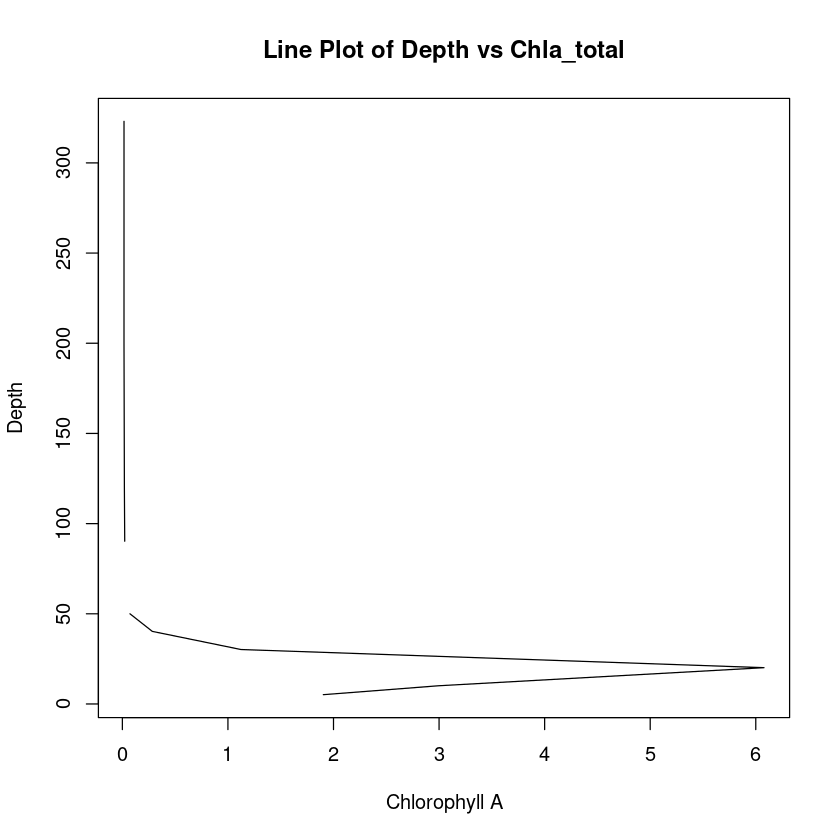

In [3]:
plot(chla_total, depth, type = "l", xlab = "Chlorophyll A", ylab = "Depth", main = "Line Plot of Depth vs Chla_total")

Let's turn that around so depth is increasing going downwards.

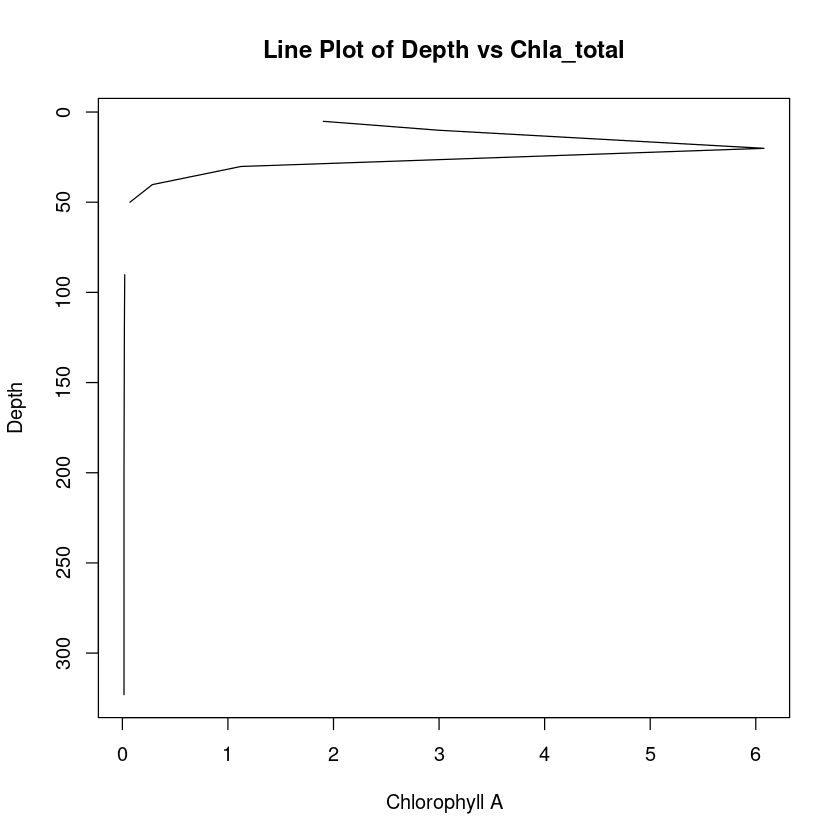

In [4]:
plot(chla_total, depth, type = "l", xlab = "Chlorophyll A", ylab = "Depth", main = "Line Plot of Depth vs Chla_total", ylim = c(max(depth), min(depth)))

## Plotting 2D data on a map

We will load in some multidimensional data now. This is a dataset of global surface temperature anomalies from the NOAA Global Surface Temperature Dataset (NOAAGlobalTemp), Version 5.0. We introduced these data in [tutorial #01](01_opening_and_understanding.ipynb).

https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C01585

H.-M. Zhang, B. Huang, J. H. Lawrimore, M. J. Menne, and T. M. Smith (2019): NOAA Global Surface Temperature Dataset (NOAAGlobalTemp), Version 5.0. NOAA National Centers for Environmental Information. doi:10.25921/9qth-2p70 Accessed 2024-04-09.

In [5]:
url <- 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
data <- open.nc(url)

We want to access the *anom* variable and extract data only for a data of our choice. Let's repeat the steps we took in [tutorial #01](01_opening_and_understanding.ipynb) to do this.

In [6]:
lat <- var.get.nc(data, 'lat')
lon <- var.get.nc(data, 'lon')

desired_date <- as.Date('2020-01-01')
days_since_1800 <- as.numeric(difftime(desired_date, as.Date('1800-01-01'), units = 'days'))

time <- var.get.nc(data, "time") 
# Finding index of the value
time_index <- which(time == days_since_1800)

anom <- var.get.nc(data, 'anom', start=c(NA, NA, 1, time_index), count=c(NA,NA,1,1))

Now let's make a very basic plot of the data.

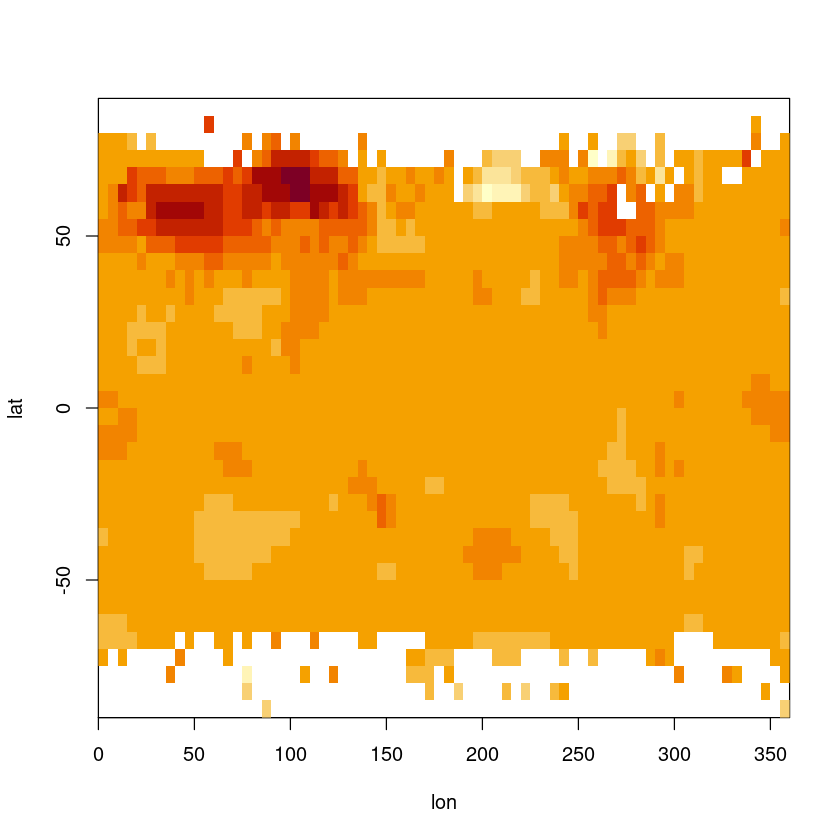

In [7]:
image(lon, lat, anom)

That is very basic! It would be more useful if we included the coastlines and also used a white-centred colour palette. Let's use ggplot.

The longitudes need to be adjusted to between -180° and 180° to align with the coastlines in the map.

Warning message in geom_map(data = map_data("world"), map = map_data("world"), aes(x = long, :
“Ignoring unknown aesthetics: x and y”


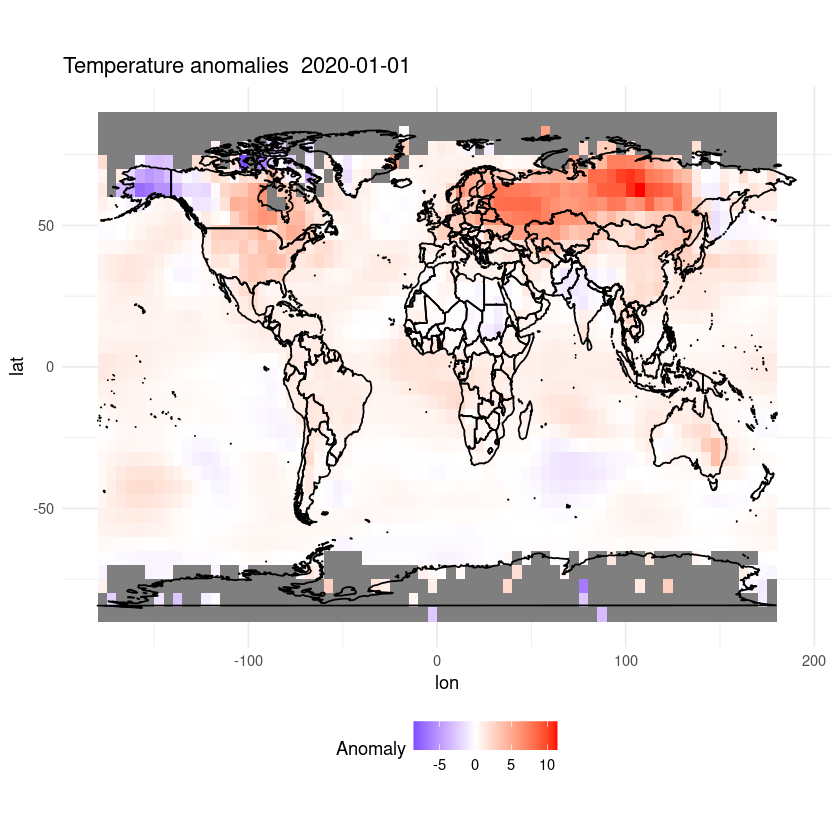

In [8]:
# Adjust lon variable
lon <- ifelse(lon > 180, lon - 360, lon)

# Convert data to data frame
df <- expand.grid(lon = lon, lat = lat)
df$anom <- as.vector(anom)

# Create the plot using ggplot2
ggplot(df, aes(x = lon, y = lat, fill = anom)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(min(df$anom), max(df$anom))) +
  coord_fixed(ratio = 1.5) +  # Adjust the aspect ratio if needed
  theme_minimal() +
  labs(fill = "Anomaly") +
  theme(legend.position = "bottom") +
  ggtitle(paste("Temperature anomalies ", desired_date)) +
  geom_map(data = map_data("world"), map = map_data("world"),
           aes(x = long, y = lat, map_id = region), color = "black", fill = NA)

This is only a short demonstration of how easy it can be to plot data out of a CF-NetCDF file. R is great for plotting data and data analysis and there are many good tutorials online, so go and explore!